In [ ]:
!pip install -q openTSNE

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from openTSNE import TSNE as openTSNE
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.style.use('ggplot')

# Данные

Импортируем датасет MNIST (только тестовую его часть из 10 тыс. изображений)

In [ ]:
(_, _), (X, y) = mnist.load_data()

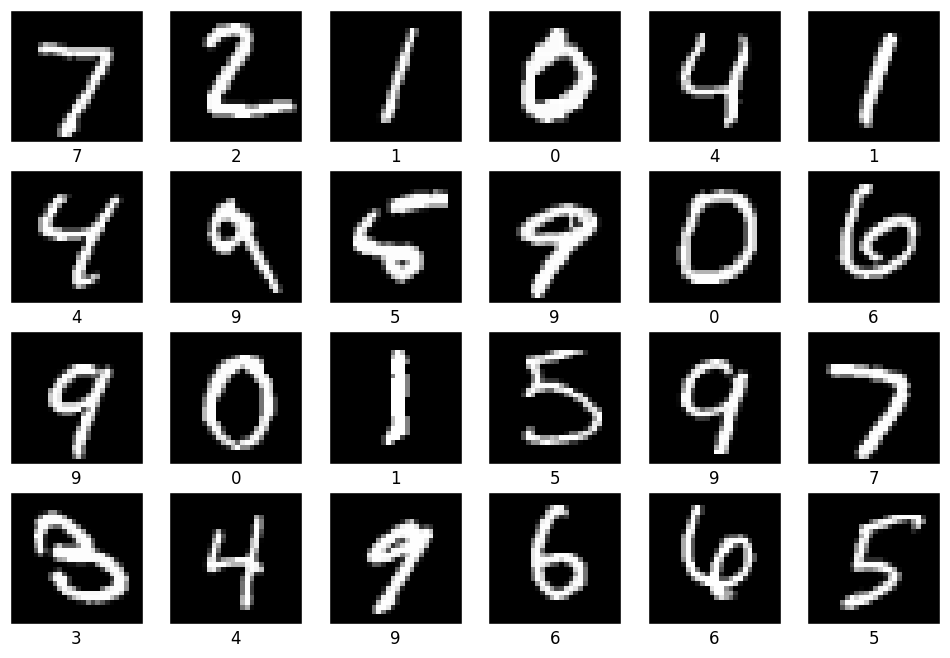

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i], color='black')

In [ ]:
X = X.reshape(X.shape[0],-1)

# [OpenTSNE](https://opentsne.readthedocs.io/en/latest/index.html)

OpenTSNE — это достаточно большая библиотека, реализующая модель t-SNE. Настоятельно рекомендуем ознакомиться с документацией. Там можно почерпнуть массу интересной и полезной информации по рассматриваемой теме. В том числе библиотека позволяет применять полученное преобразование к новым данным.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
tsne = openTSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [ ]:
embedding_train = tsne.fit(X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 24.56 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.62 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.16 seconds
===> Running optimization with exaggeration=12.00, lr=666.67 for 250 iterations...
Iteration   50, KL divergence 4.4795, 50 iterations in 63.7237 sec
Iteration  100, KL divergence 4.5942, 50 iterations in 58.4986 sec
Iteration  150, KL divergence 4.5921, 50 iterations in 65.1066 sec
Iteration  200, KL divergence 4.5922, 50 iterations in 64.6225 sec
Iteration  250, KL divergence 4.5922, 50 iterations in 64.6770 sec
   --> Time elapsed: 316.63 seconds
===> Running optimization with exagger

In [ ]:
embedding_test = embedding_train.transform(X_test)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.87 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 21703.6605, 50 iterations in 14.6254 sec
Iteration  100, KL divergence 21581.3212, 50 iterations in 15.5555 sec
Iteration  150, KL divergence 21554.0072, 50 iterations in 14.0213 sec
Iteration  200, KL divergence 21543.6518, 50 iterations in 17.3695 sec
Iteration  250, KL divergence 21519.9445, 50 iterations in 16.8373 sec
   --> Time elapsed: 78.41 seconds


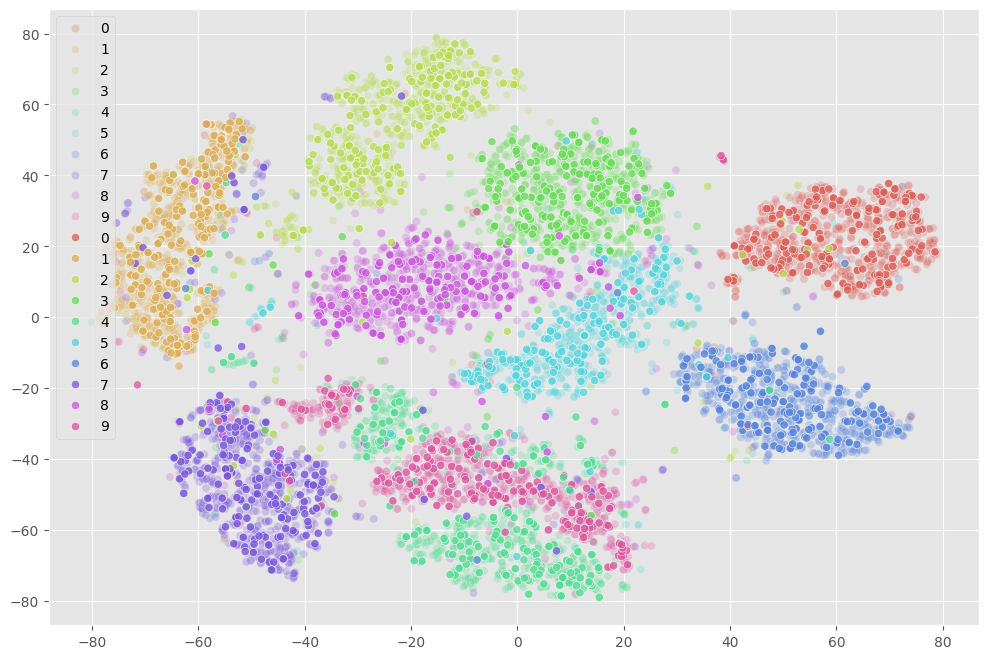

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x=embedding_train[:,0], y=embedding_train[:,1], palette=sns.color_palette("hls", 10), hue=y_train, alpha=0.25)
sns.scatterplot(x=embedding_test[:,0], y=embedding_test[:,1], hue=y_test, palette=sns.color_palette("hls", 10), alpha=0.75)
plt.show()

Видно, что тестовые данные достаточно гармонично и корректно располагаются рядом с тренировочными.

# Задание

Продемонстрируйте влияние параметров <code>perplexity</code>, `exaggeration` и <code>dof</code> на результаты понижения размерности:

In [ ]:
(_, _), (X, y) = mnist.load_data()

# Ограничим данные для ускорения вычислений
X = X[:5000]
y = y[:5000]

X = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

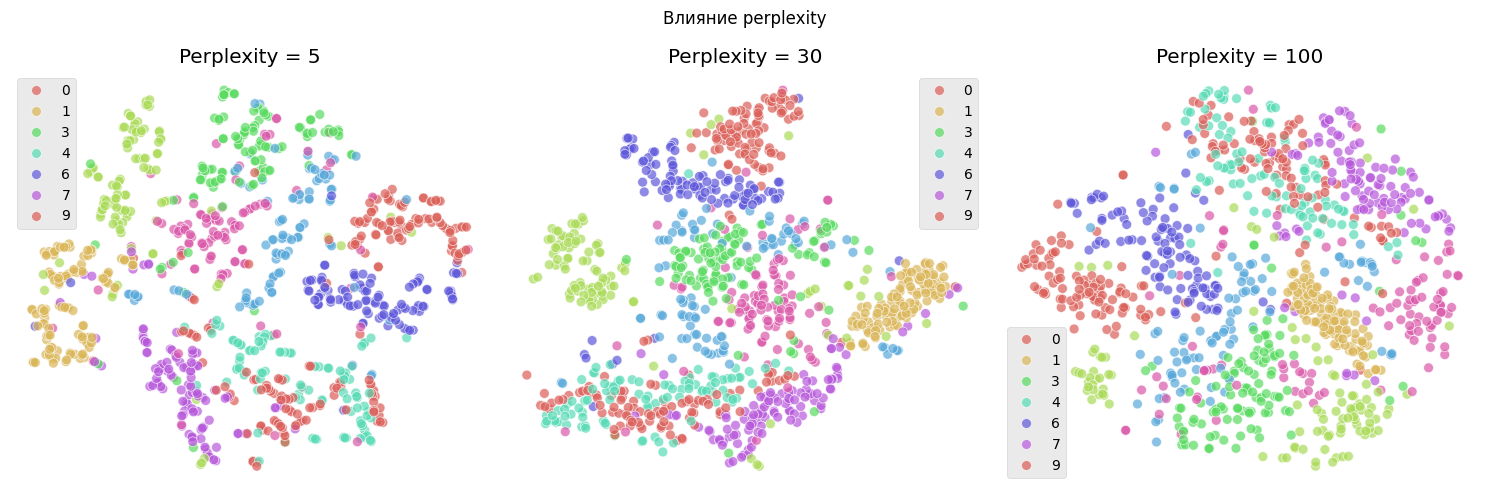

In [ ]:
from openTSNE import TSNE
plt.figure(figsize=(15, 5))

perplexities = [5, 30, 100]
for i, p in enumerate(perplexities):
    tsne = TSNE(perplexity=p, n_jobs=8, random_state=42, verbose=False)
    embedding = tsne.fit(X_train[:1000])  # уменьшим выборку для скорости

    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y_train[:1000], palette="hls", alpha=0.7, s=50)
    plt.title(f'Perplexity = {p}')
    plt.axis('off')

plt.suptitle("Влияние perplexity")
plt.tight_layout()
plt.show()

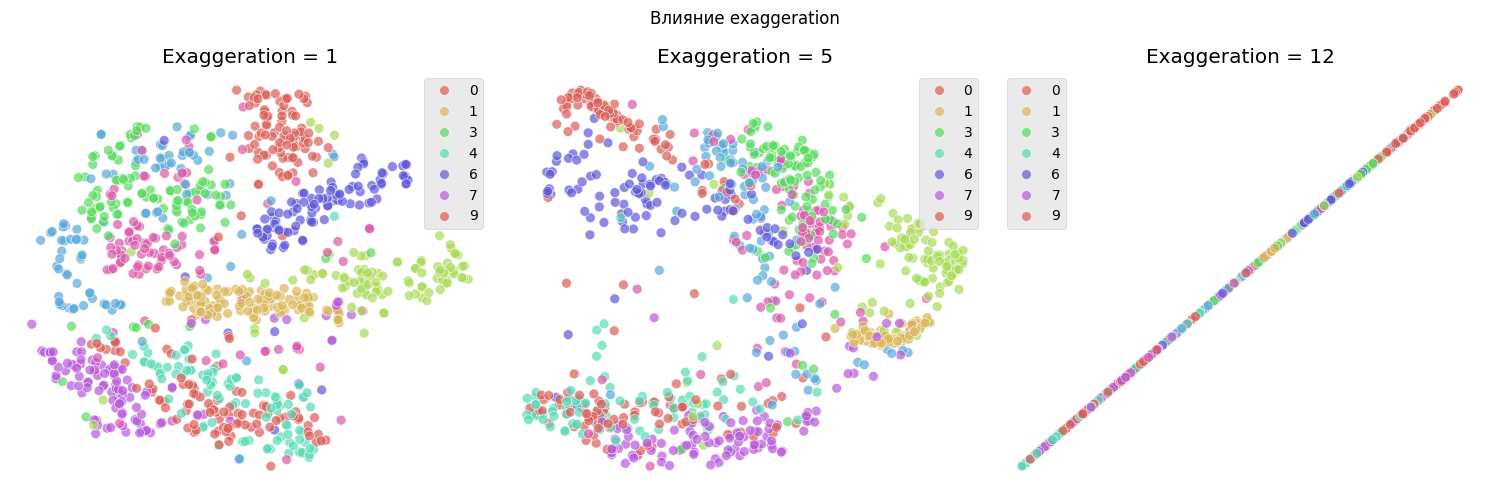

In [ ]:
plt.figure(figsize=(15, 5))
exaggerations = [1, 5, 12]
for i, e in enumerate(exaggerations):
    tsne = TSNE(perplexity=30, exaggeration=e, n_jobs=8, random_state=42, n_iter=250, learning_rate=200, verbose=False)
    embedding = tsne.fit(X_train[:1000])

    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y_train[:1000], palette="hls", alpha=0.7, s=50)
    plt.title(f'Exaggeration = {e}')
    plt.axis('off')

plt.suptitle("Влияние exaggeration")
plt.tight_layout()
plt.show()

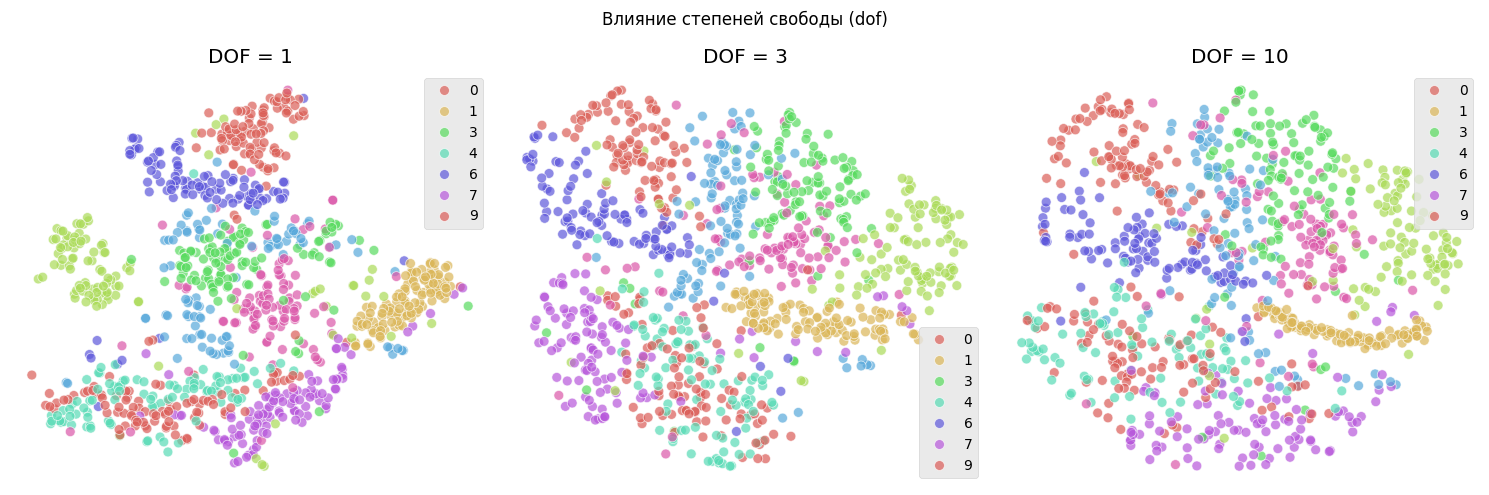

In [ ]:
plt.figure(figsize=(15, 5))
dofs = [1, 3, 10]
for i, df in enumerate(dofs):
    tsne = TSNE(perplexity=30, dof=df, n_jobs=8, random_state=42, verbose=False)
    embedding = tsne.fit(X_train[:1000])

    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y_train[:1000], palette="hls", alpha=0.7, s=50)
    plt.title(f'DOF = {df}')
    plt.axis('off')

plt.suptitle("Влияние степеней свободы (dof)")
plt.tight_layout()
plt.show()